# [E-02] Classifications
"Exploration Node 2. load_digits, load_wine, load_breast_cancer" / 2022. 01. 13 (Thu) 이형주

## Contents
---
- **Project (1) Load_digits - 손글씨 분류**
- **Project (2) Load_wine - 와인 분류**
- **Project (3) Load_breast_cancer - 유방암 환자 분류**
- **프로젝트 회고**    

## Rubric 평가기준
---

|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨.
|2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?|모델학습 및 테스트가 정상적으로 수행되었음.
|3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?|평가지표 선택 및 이유 설명이 타당함.


### Project (1) Load_digits - 손글씨 분류

#### 데이터셋의 구성 - 1) 데이터 준비

In [1]:
## Sklearn 모듈 Import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### 데이터셋의 구성 - 2) 데이터 이해하기

In [2]:
## load_digit() 메서드 사용
## digits의 변수와 메서드
## digits의 타입
digits = load_digits()
print(dir(digits))
print(type(dir(digits)))

#digits의 데이터 정보 확인
digits.keys()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'list'>


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
##feature Data 지정, data 리스트를 digits_data로
##data 1797개, pixel 64개
digits_data = digits.data
print(digits_data.shape)

##label Data 지정, target 리스트를 label로
##label 1797개
digits_label = digits.target
print(digits_label.shape)
digits_label

##target name 출력
##target_name은 0부터 9까지의 값 저장
##digits label을 50개까지 출력
##digits label도 0부터 9까지의 값 저장
print(digits.target_names)
print(digits_label[:50])

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


In [8]:
print(digits.DESCR)

## digits DataSet Descriptions

## Number of Instances: 1797개의 이미지 데이터
## Image Information: 8x8 image of integer pixels
## -> matplotlib Import시 Reshape 영역에 8, 8 기재

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

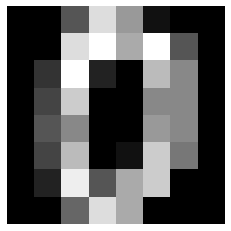

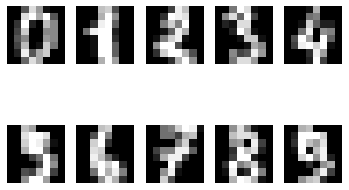

In [7]:
## E-01에 사용했던 matplotlib 참고하여 Import
## 앞서 살펴보았던 숫자 형태 및 구성 시각화

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [11]:
##digits_data descriptions
##image data로 구성되어 있음
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### 데이터셋의 구성 - 3) 데이터 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7)

print("X_train :", len(X_train), "X_test :", len(X_test))
# 4대 1의 비율로 분할됨
print(X_train.shape, y_train.shape)
# train 데이터 및 라벨의 행렬구조 확인
print(X_test.shape, y_test.shape)
# test 데이터 및 라벨의 행렬구조 확인

X_train : 1437 X_test : 360
(1437, 64) (1437,)
(360, 64) (360,)


|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 데이터셋의 구성이 합리적으로 진행되었는가?|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨.

### 데이터셋의 모델 적용 결론

+ **Model Accuracies' Comparision**
    - Decision Tree: 86%
    - Random Forest: 96%
    - SVM: 99%
    - SGD Classifier: 94%
    - Logistic Regression: 95%
  
  
+ **load_digits Project Conclusion**
    - Random Forest 이외의 4가지 모델을 쓰는 것이 좋고, 특히 SVM 모델의 정확도가 가장 좋았다.

#### 데이터셋의 모델 적용 - 1) Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

decision_tree = DecisionTreeClassifier(random_state=32) 
##Decision Tree Model Creation
decision_tree.fit(X_train, y_train) 
##Model Training
y_pred01 = decision_tree.predict(X_test)
##Model Predictions

print(classification_report(y_test, y_pred01))
print(confusion_matrix(y_test, y_pred01))
##오차 행렬(confusion matrix) 적용
##Results Printing (각 모델별 비교 예정)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

print(accuracy_score(y_test, y_pred01))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0

**Accuracy: 86% (반올림)**

+ Number 0, 5, 7, 8 값이 macro avg보다 Accuracy가 높다. (Precision Part)
+ Number 0, 3, 4, 5, 6 값이 macro avg보다 Accuracy가 높다. (Recall Part)

**Conclusion: Decision Tree는 수치적으로는 Accuracy가 높지만, confusion matrix에서는 5부터 9 Class의 오답률 차이가 발생하였고 Precision - Recall간 수치 차이가 크므로 우수한 classification 모델이라고 하기 어렵다.**

#### 데이터셋의 모델 적용 - 2) Random Forest

In [21]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred02 = random_forest.predict(X_test)

print(classification_report(y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02))
print(accuracy_score(y_test, y_pred02))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0

**Accuracy: 96% (반올림)**

+ Number 0, 2, 3, 6, 8 값이 macro avg보다 Accuracy가 높다. (Precision Part)
+ Number 1 - 7 값이 macro avg보다 Accuracy가 높다. (Recall Part)

+ Recall Part의 Number 8 값의 Precision - Recall 수치 차이가 두드러지는 것으로 보아, 8의 Image Data를 (상대적으로) 모델이 정확한 Classification을 처리하지 못했다.

**Conclusion: Decision Tree보다 상대적으로 Precision - Recall 수치 차이가 크게 적고, Accuracy도 월등히 좋다. 또한 5, 6 Class에서만 오답률 차이가 발생하여 classification에 적합한 모델로 볼 수 있다.**

#### 데이터셋의 모델 적용 - 3) SVM

In [23]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
y_pred03 = svm_model.predict(X_test)

print(classification_report(y_test, y_pred03))
print(confusion_matrix(y_test, y_pred03))
print(accuracy_score(y_test, y_pred03))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0

**Accuracy: 99% (반올림)**

+ Number 1, 5 값이 macro avg보다 Accuracy가 낮다. (Precision Part)
+ Number 8, 9 값이 macro avg보다 Accuracy가 낮다. (Recall Part)

**Conclusion: Decision Tree, Random Forest 보다 상대적으로 Precision - Recall 수치 차이가 크게 적고, Accuracy도 월등히 좋다. 세 모델 가운데에서는 classification에 적합한 모델로 볼 수 있다.**

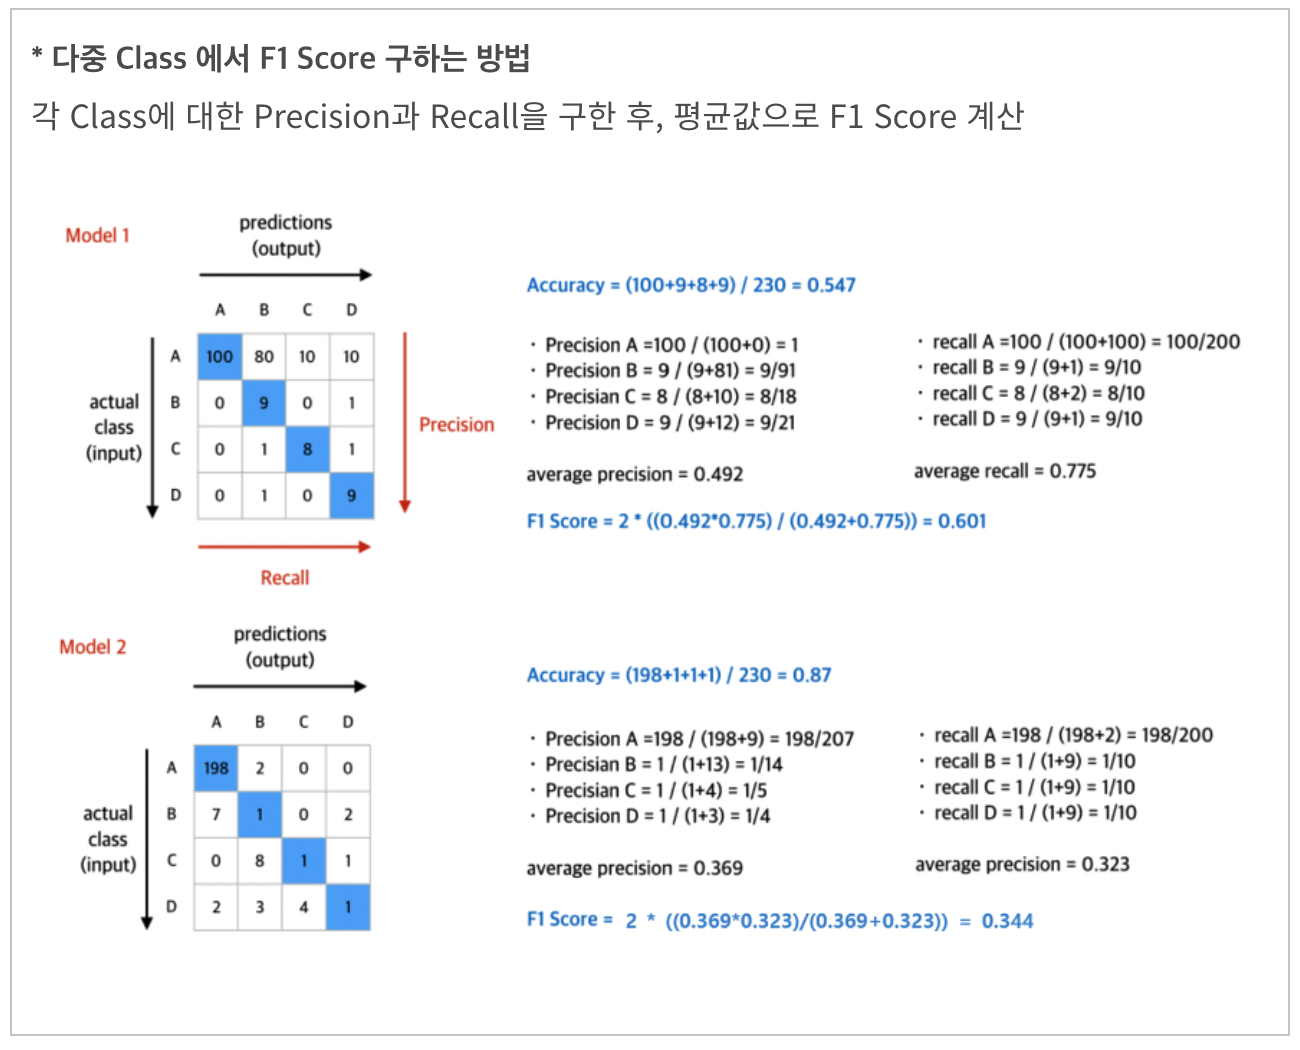

**Accuracy 99%가 비정상적으로 너무 높은 것은 아닐까**

Data가 Imbalanced 할 때, [Accuracy가 아닌 F1 Score를 사용한다고 한다.](https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score)
각 모델별 F1 Score를 비교해 보면 아래와 같으므로 **현재까지는 SVM 모델의 성능이 가장 좋다.**

+ Decision Tree -> 0.86
+ Random Forest -> 0.96
+ SVM -> 0.99

#### 데이터셋의 모델 적용 - 4) SGD Classifier

In [24]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
y_pred04 = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred04))
print(confusion_matrix(y_test, y_pred04))
print(accuracy_score(y_test, y_pred04))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  1  0  0  0  0  0  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  1  0  0  0  0 26  0  1  0]
 [ 0  0  0

**Accuracy: 94% (반올림)**

+ Number 1, 3, 5 값이 macro avg보다 Accuracy가 낮다. (Precision Part)
+ Number 1, 8, 9 값이 macro avg보다 Accuracy가 낮다. (Recall Part)

**Conclusion: 현재까지는 SVM 모델의 성능이 가장 좋다. 그리고 SGD Classifier는 [Scikit-learn 공식 홈페이지](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)에 따르면, 단일 데이터로 손실 Gradient를 계산한 뒤 하강 곡선을 그리며 학습하는 형태이다. 또한 데이터의 평균과 단위 분산값이 0이어야 이상적이라는 내용을 보니, 0-9까지 다양한 값들이 존재하는 상황에서는 이상적인 모델이라고 보기 어려워 보인다. 다만, 데이터를 랜덤하게 섞는(Shuffling) 것은 기본값이 None 임을 확인하였다.**

**Source**

+ the gradient of the loss is **estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).**
+ For best results using the default learning rate schedule, **the data should have zero mean and unit variance.**
+ random_stateint, RandomState instance, **default=None**
    - Used for shuffling the data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls.

#### 데이터셋의 모델 적용 - 5) Logistic Regression

In [25]:
logistic_model = LogisticRegression(random_state=32)

logistic_model.fit(X_train, y_train)
y_pred05 = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred05))
print(confusion_matrix(y_test, y_pred05))
print(accuracy_score(y_test, y_pred05))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  1  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  1  0]
 [ 0  0  0  0  0  0 27  0  1  0]
 [ 0  0  0

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy: 95% (반올림)**

+ Number 5, 8 값이 macro avg보다 Accuracy가 낮다. (Precision Part)
+ Number 8, 9 값이 macro avg보다 Accuracy가 낮다. (Recall Part)

**Conclusion: SVM 모델의 성능이 가장 좋다. Confusion Matrix는 5, 6, 9 Class에서 오답률 차이가 보였다. 그리고 Warning의 경우 모델 자체의 최적화 이슈로 보이나 데이터셋은 지정되어 있으므로 추가 대응은 현재로서는 하지 않기로 한다.**

|  평가문항  |  상세기준  |
|:---------|:---------|
|2. 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?|모델학습 및 테스트가 정상적으로 수행되었음.
|3. 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?|평가지표 선택 및 이유 설명이 타당함.

### Project (2) Load_wine - 와인 분류

#### 데이터셋의 구성 - 1) 데이터 준비

In [12]:
## Sklearn 모듈 Import

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression

#### 데이터셋의 구성 - 2) 데이터 이해하기

In [2]:
## load_wine() 메서드 사용
## wine의 변수와 메서드
## wine의 타입
wine = load_wine()
print(dir(wine))
print(type(dir(wine)))

#wine의 데이터 정보 확인
wine.keys()

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
<class 'list'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
##feature Data 지정, data 리스트를 wine_data로
##data 178개, pixel 13개
wine_data = wine.data
print(wine_data.shape)

##label Data 지정, target 리스트를 label로
##label 178개
wine_label = wine.target
print(wine_label.shape)
wine_label

##target name 출력
##target_name은 0부터 2까지의 값 저장
print(wine.target_names)

(178, 13)
(178,)
['class_0' 'class_1' 'class_2']


In [5]:
print(wine.DESCR)

## wine DataSet Descriptions
## Number of Instances: 178개의 수치 데이터

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [8]:
##wine_data descriptions
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

#### 데이터셋의 구성 - 3) 데이터 분리

In [10]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=7)

print("X_train :", len(X_train), "X_test :", len(X_test))
# 4대 1의 비율로 분할됨 (Test 20%, Training 80%)
print(X_train.shape, y_train.shape)
# train 데이터 및 라벨의 행렬구조 확인
print(X_test.shape, y_test.shape)
# test 데이터 및 라벨의 행렬구조 확인

X_train : 142 X_test : 36
(142, 13) (142,)
(36, 13) (36,)


|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 데이터셋의 구성이 합리적으로 진행되었는가?|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨.

### 데이터셋의 모델 적용 결론

+ **Model Accuracies' Comparision**
    - Decision Tree: 94%
    - Random Forest: 100%
    - SVM: 61%
    - SGD Classifier: 64%
    - Logistic Regression: 97%
  
  
+ **load_wine Project Conclusion**
    - Random Forest가 가장 좋고, Decision Tree도 사용하기에 적합한 모델이다.
    - SVM, SGD Classifier의 오답률 차이가 매우 커서 사용하기에 부적합하다.

#### 데이터셋의 모델 적용 - 1) Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

decision_tree = DecisionTreeClassifier(random_state=32) 
##Decision Tree Model Creation
decision_tree.fit(X_train, y_train) 
##Model Training
y_pred01 = decision_tree.predict(X_test)
##Model Predictions

print(classification_report(y_test, y_pred01))
print(confusion_matrix(y_test, y_pred01))
##오차 행렬(confusion matrix) 적용
##Results Printing (각 모델별 비교 예정)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

print(accuracy_score(y_test, y_pred01))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

[[ 7  0  0]
 [ 0 17  0]
 [ 0  2 10]]
0.9444444444444444


**Accuracy: 94% (반올림)**

+ Class 1은 macro avg보다 Accuracy가 낮다. (Precision 측면)
+ Class 2는 macro avg보다 Accuracy가 낮다. (Recall 측면)

**Conclusion: confusion matrix에서는 Class 2에서 오답률 차이가 발생하였다. Accuracy에 문제가 있는 것이 아니라면 정확도가 높은 모델이다.**

#### 데이터셋의 모델 적용 - 2) Random Forest

In [14]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred02 = random_forest.predict(X_test)

print(classification_report(y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02))
print(accuracy_score(y_test, y_pred02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]
1.0


**Accuracy: 100%**

**Conclusion: 전체 클래스에서 100%의 Accuracy를 기록하였다. 가장 정확도가 높은 모델이 되었다.**

#### 데이터셋의 모델 적용 - 3) SVM

In [15]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
y_pred03 = svm_model.predict(X_test)

print(classification_report(y_test, y_pred03))
print(confusion_matrix(y_test, y_pred03))
print(accuracy_score(y_test, y_pred03))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36

[[ 6  0  1]
 [ 1 15  1]
 [ 0 11  1]]
0.6111111111111112


**Accuracy: 61% (반올림)**

+ Class 1, 2는 micro svg보다 Accuracy가 낮다.
+ Class 2는 micro svg보다 Accuracy가 낮다.

**Conclusion: SVM 모델은 상대적으로 Accuracy가 낮기 때문에, 와인 분류 모델로는 부적합하다.**

#### 데이터셋의 모델 적용 - 4) SGD Classifier

In [16]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
y_pred04 = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred04))
print(confusion_matrix(y_test, y_pred04))
print(accuracy_score(y_test, y_pred04))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.59      0.94      0.73        17
           2       0.00      0.00      0.00        12

    accuracy                           0.64        36
   macro avg       0.46      0.65      0.53        36
weighted avg       0.43      0.64      0.51        36

[[ 7  0  0]
 [ 1 16  0]
 [ 1 11  0]]
0.6388888888888888


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Accuracy: 64% (반올림)**

+ confusion matrix에서, Class 2의 오답률 차이가 크다. 

**Conclusion: SGD Classifier 모델도 상대적으로 Accuracy가 낮기 때문에, 와인 분류 모델로는 부적합하다.**

#### 데이터셋의 모델 적용 - 5) Logistic Regression

In [17]:
logistic_model = LogisticRegression(random_state=32)

logistic_model.fit(X_train, y_train)
y_pred05 = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred05))
print(confusion_matrix(y_test, y_pred05))
print(accuracy_score(y_test, y_pred05))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36

[[ 6  1  0]
 [ 0 17  0]
 [ 0  0 12]]
0.9722222222222222


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy: 97% (반올림)**

+ confusion matrix에서는 1개의 오답만 발생하였다.

**Conclusion: Accuracy가 매우 높은 수준이므로, Logistic Regression은 Random Forest와 함께 와인 분류모델로 적합하다.**

|  평가문항  |  상세기준  |
|:---------|:---------|
|2. 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?|모델학습 및 테스트가 정상적으로 수행되었음.
|3. 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?|평가지표 선택 및 이유 설명이 타당함.

### Project (3) Load_breast_cancer - 유방암 진단

#### 데이터셋의 구성 - 1) 데이터 준비

In [1]:
## Sklearn 모듈 Import

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression

#### 데이터셋의 구성 - 2) 데이터 이해하기

In [2]:
## load_breast_cancer() 메서드 사용
## breast_cancer의 변수와 메서드
## breast_cancer의 타입
breast_cancer = load_breast_cancer()
print(dir(breast_cancer))
print(type(dir(breast_cancer)))

#breast_cancer의 데이터 정보 확인
breast_cancer.keys()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
<class 'list'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
##feature Data 지정, data 리스트를 breast_cancer_data로
##data 569개, pixel 30개
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

##label Data 지정, target 리스트를 label로
##label 569개
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

##target name 출력
##target_name은 0부터 1까지의 값 저장
## -> 악성종양(암) 또는 양성종양
##breast_cancer_label을 50개까지 출력
##breast_cancer_label도 0부터 1까지의 값 저장
print(breast_cancer.target_names)
print(breast_cancer_label[:50])

(569, 30)
(569,)
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1]


In [5]:
print(breast_cancer.DESCR)

## breast_cancer DataSet Descriptions
## Number of Instances: 569개의 데이터

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
##breast_cancer_data descriptions
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

#### 데이터셋의 구성 - 3) 데이터 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                   breast_cancer_label,
                                                   test_size=0.2,
                                                   random_state=7)

print("X_train :", len(X_train), "X_test :", len(X_test))
# 4대 1의 비율로 분할됨 (Training Set 80%, Test Set 20%)
print(X_train.shape, y_train.shape)
# train 데이터 및 라벨의 행렬구조 확인
print(X_test.shape, y_test.shape)
# test 데이터 및 라벨의 행렬구조 확인

X_train : 455 X_test : 114
(455, 30) (455,)
(114, 30) (114,)


|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 데이터셋의 구성이 합리적으로 진행되었는가?|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨.

### 데이터셋의 모델 적용 결론

+ **Model Accuracies' Comparision**
    - Decision Tree: 91%
        + Recall 0.82
    - Random Forest: 100%
        + Recall 1.0
    - SVM: 90%
        + Recall 0.72
    - SGD Classifier: 89%
        + Recall 0.75
    - Logistic Regression: 94%
        + Recall 0.82
  
  
+ **load_digits Project Conclusion**
    - Random Forest을 쓰는 것이 좋다. 나머지 모델은 7~12명의 오진이 발생하였다.
    - Recall 값을 더 중요하게 판단하여야 한다.

#### 데이터셋의 모델 적용 - 1) Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

decision_tree = DecisionTreeClassifier(random_state=32) 
##Decision Tree Model Creation
decision_tree.fit(X_train, y_train) 
##Model Training
y_pred01 = decision_tree.predict(X_test)
##Model Predictions

print(classification_report(y_test, y_pred01))
print(confusion_matrix(y_test, y_pred01))
##오차 행렬(confusion matrix) 적용
##Results Printing (각 모델별 비교 예정)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

print(accuracy_score(y_test, y_pred01))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

[[33  7]
 [ 3 71]]
0.9122807017543859


## 악성종양 환자에게 잘못된 판정을 하면 안 되므로, Recall 값을 우선시 하여야 한다.

**Accuracy: 91% (반올림)**

+ Recall (MIN) 0.82, macro avg 0.89 / confusion matrix에서는 7의 치명적 오답률(오진)이 발생하였다. 

**Conclusion: Accuracy 자체는 높으나, 오진률도 발생하는 모델이다.**

#### 데이터셋의 모델 적용 - 2) Random Forest

In [9]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred02 = random_forest.predict(X_test)

print(classification_report(y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02))
print(accuracy_score(y_test, y_pred02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[40  0]
 [ 0 74]]
1.0


**Accuracy: 100%**

+ Recall 1.0

**Conclusion: 현재까지 가장 정확하게 진단을 한 모델이다.**

#### 데이터셋의 모델 적용 - 3) SVM

In [10]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
y_pred03 = svm_model.predict(X_test)

print(classification_report(y_test, y_pred03))
print(confusion_matrix(y_test, y_pred03))
print(accuracy_score(y_test, y_pred03))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114

[[29 11]
 [ 0 74]]
0.9035087719298246


**Accuracy: 90% (반올림)**

+ Recall (MIN) 0.72, macro avg 0.86 / confusion matrix에서는 11의 치명적 오답률(오진)이 발생하였다. 

**Conclusion: Accuracy 자체는 높으나, 오진률도 발생하는 모델이며 상대적인 성능이 불리하므로 사용에 부적합하다.**

#### 데이터셋의 모델 적용 - 4) SGD Classifier

In [11]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
y_pred04 = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred04))
print(confusion_matrix(y_test, y_pred04))
print(accuracy_score(y_test, y_pred04))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114

[[28 12]
 [ 0 74]]
0.8947368421052632


**Accuracy: 89% (반올림)**

+ Recall (MIN) 0.70, macro avg 0.85 / confusion matrix에서는 12의 치명적 오답률(오진)이 발생하였다. 

**Conclusion: Accuracy 자체는 높으나, 오진률도 높게 발생하는 모델이다. 성능 비교시 사용에 부적합한 모델이다.**

#### 데이터셋의 모델 적용 - 5) Logistic Regression

In [12]:
logistic_model = LogisticRegression(random_state=32)

logistic_model.fit(X_train, y_train)
y_pred05 = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred05))
print(confusion_matrix(y_test, y_pred05))
print(accuracy_score(y_test, y_pred05))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[34  6]
 [ 0 74]]
0.9473684210526315


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy: 95% (반올림)**

+ Recall (MIN) 0.85, macro avg 0.93 / confusion matrix에서는 6의 치명적 오답률(오진)이 발생하였다. 

**Conclusion: Accuracy 자체는 높으나, 오진률도 발생하는 모델이다.**

|  평가문항  |  상세기준  |
|:---------|:---------|
|2. 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?|모델학습 및 테스트가 정상적으로 수행되었음.
|3. 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?|평가지표 선택 및 이유 설명이 타당함.

## 프로젝트 회고
---

+ E-01보다 난이도는 낮지만, 반복하여 3개를 진행하여야 했으므로 소요 시간은 비슷하게 발생하였다.
+ 다음에는 Iteration reached limit 오류가 발생하지 않도록 데이터셋 보강 등을 통한 리팩토링을 해보고 싶다.
+ E-02는 Ex 이전에 Fundamental로 먼저 다루는 방향으로 커리큘럼 개선이 되었으면 한다.
+ 실용적인 주제로 프로젝트를 다루는 점이 인상깊었고 인공지능에 대한 관심이 더 생기게 되었다.